In [20]:
!pip3 install pandas numpy matplotlib seaborn scikit-learn

In [2]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv(r"C:\Users\janap\OneDrive\Documents\Desktop\Task1_Titanic\data\train.csv.csv") #dataset

In [37]:
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [38]:
# Handle missing values for Age: median, Embarked: mode
df = df.fillna({
    'Age': df['Age'].median(),
    'Embarked': df['Embarked'].mode()[0]
})

In [39]:
# Encoding
df = pd.get_dummies(df, columns=['Sex','Embarked'], drop_first=True)

In [40]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df['Fare'] = scaler.fit_transform(df[['Fare']])

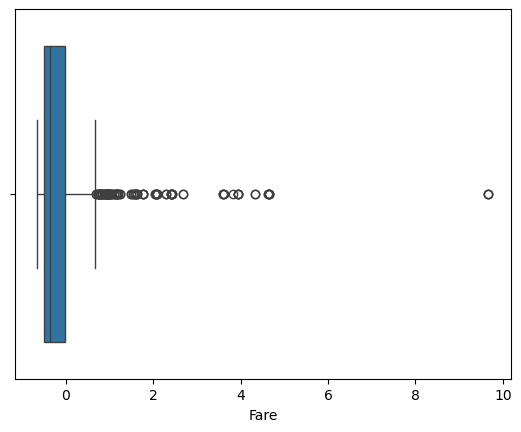

In [41]:
# Using boxplot
sns.boxplot(x=df['Fare'])
plt.show()

Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Fare'] >= Q1 - 1.5*IQR) & (df['Fare'] <= Q3 + 1.5*IQR)]

In [42]:
# Saving Cleaned Data
df.to_csv(r"C:\Users\janap\OneDrive\Documents\Desktop\Task1_Titanic\data\cleaned_titanic.csv.txt", index=False)

In [43]:
# Task 2
!pip3 install plotly

In [44]:
# Import
import plotly.express as px

In [45]:
# Summary statistics (mean, median, std, etc...)
print(df.describe(include='all'))

        PassengerId    Survived     Pclass                     Name  \
count    775.000000  775.000000  775.00000                      775   
unique          NaN         NaN        NaN                      775   
top             NaN         NaN        NaN  Braund, Mr. Owen Harris   
freq            NaN         NaN        NaN                        1   
mean     445.806452    0.339355    2.48000                      NaN   
std      260.116285    0.473796    0.73439                      NaN   
min        1.000000    0.000000    1.00000                      NaN   
25%      213.500000    0.000000    2.00000                      NaN   
50%      450.000000    0.000000    3.00000                      NaN   
75%      670.500000    1.000000    3.00000                      NaN   
max      891.000000    1.000000    3.00000                      NaN   

               Age       SibSp       Parch Ticket        Fare Cabin Sex_male  \
count   775.000000  775.000000  775.000000    775  775.000000   114

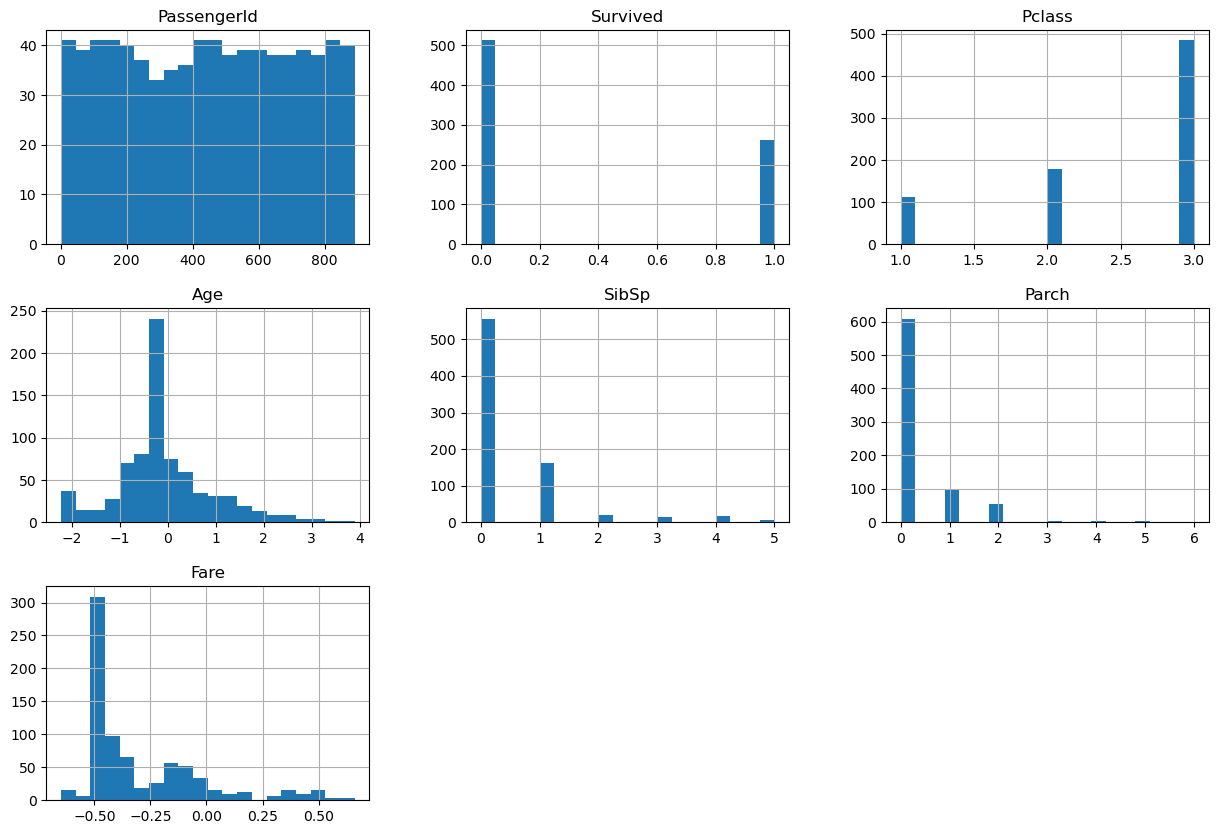

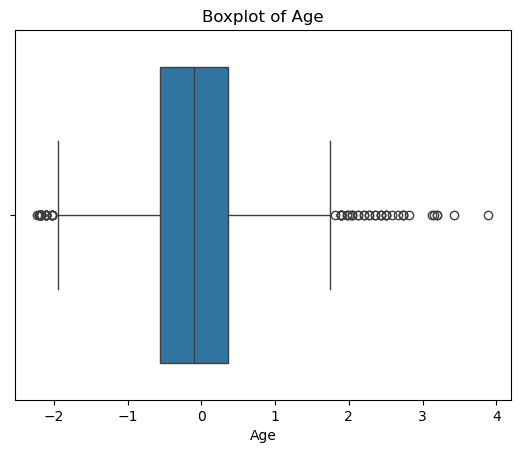

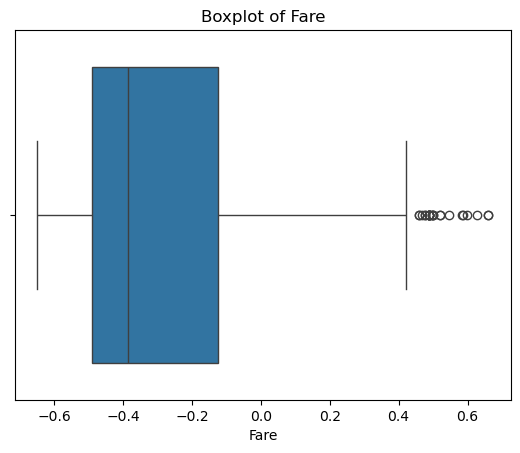

In [46]:
# Histograms for numeric features
df.hist(bins=20, figsize=(15,10))
plt.show()

# Boxplots for numeric features
for col in ['Age','Fare']:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

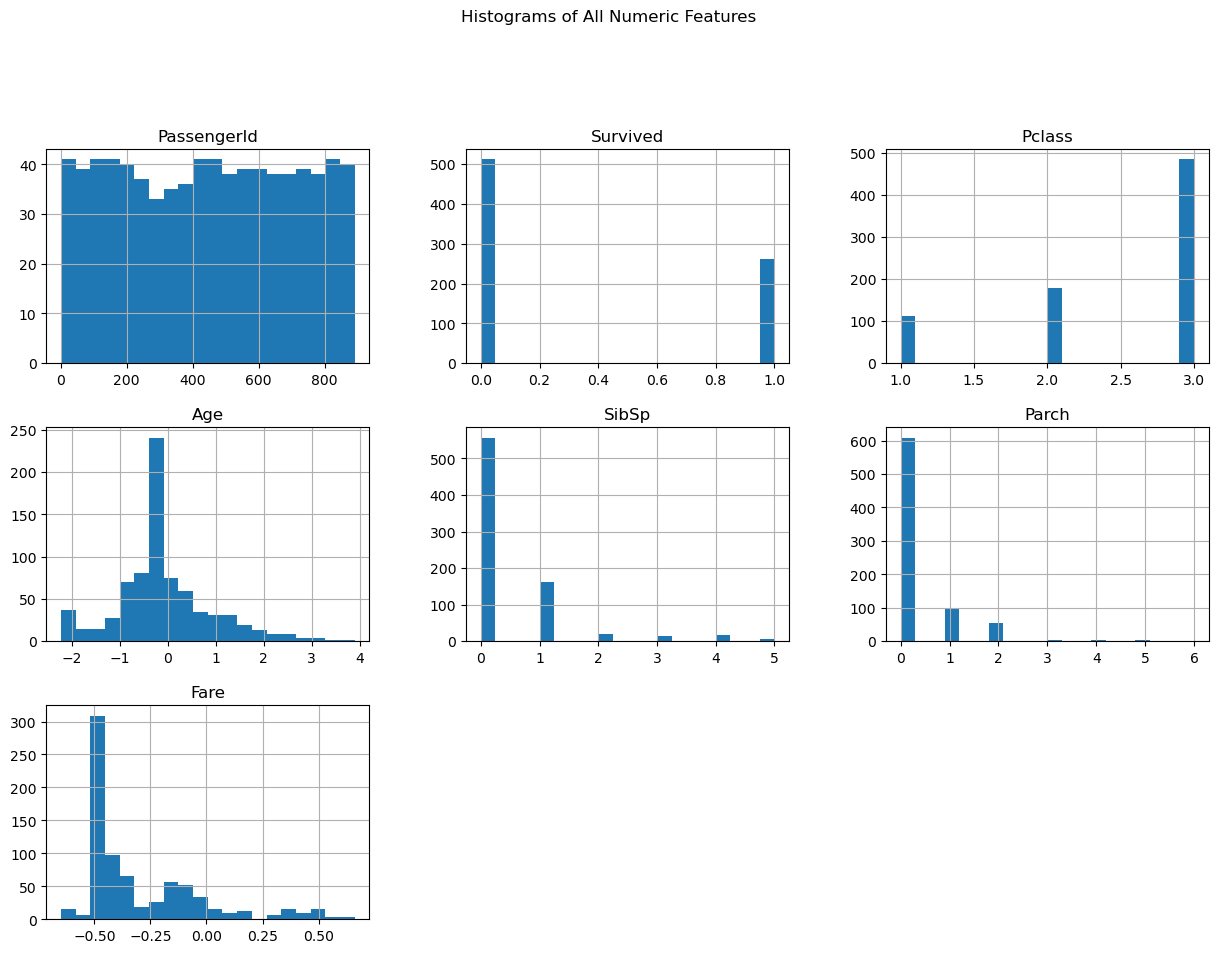

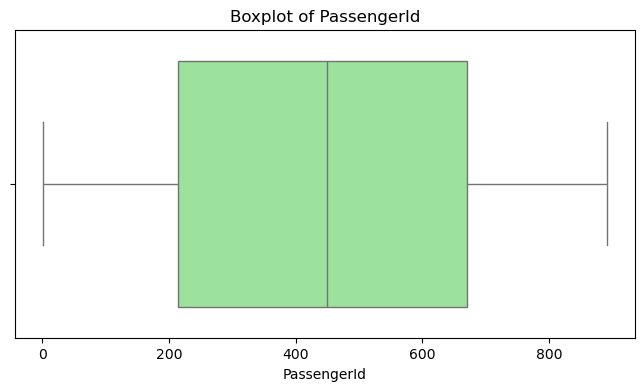

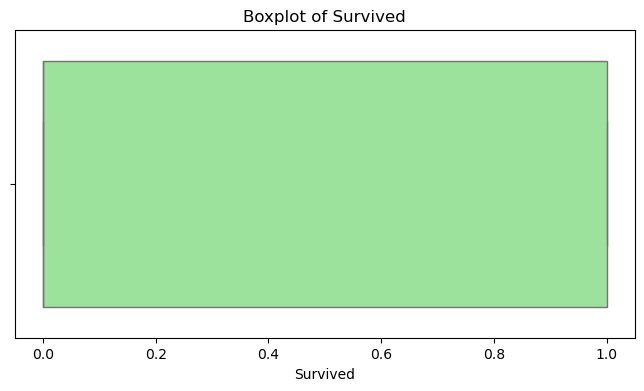

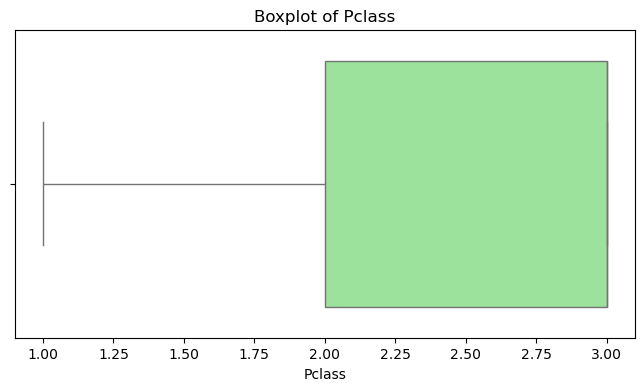

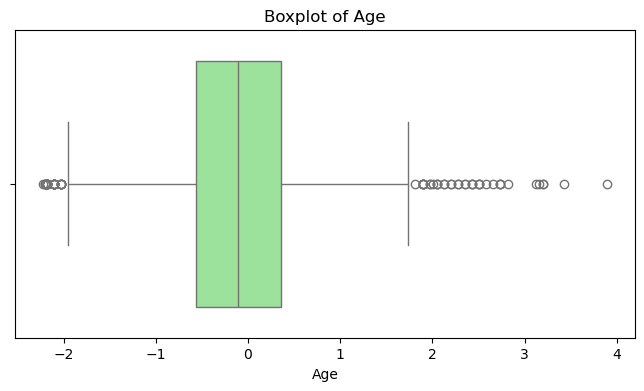

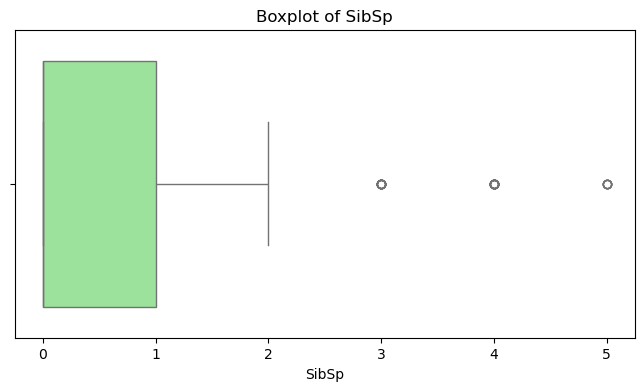

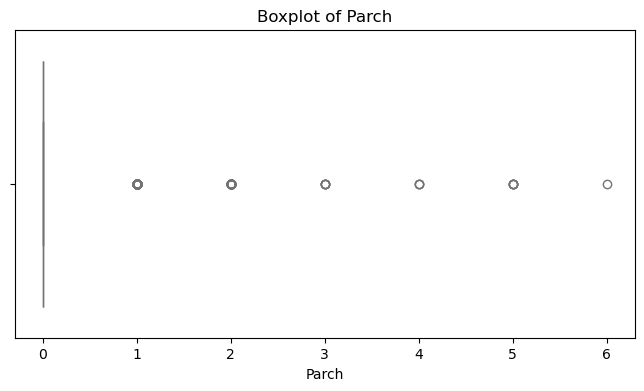

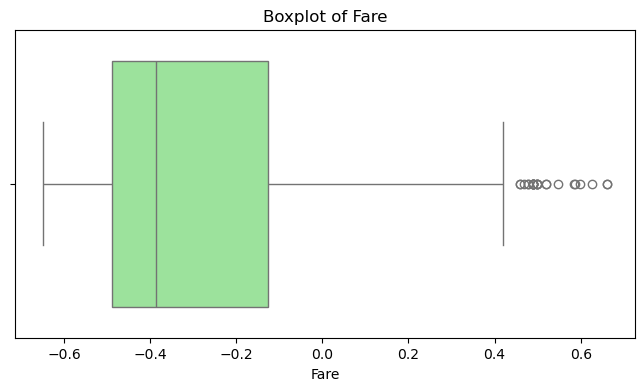

In [59]:
# ------------------ Histograms for all numeric features ------------------
numeric_cols = df.select_dtypes(include=np.number).columns

df[numeric_cols].hist(bins=20, figsize=(15,10))
plt.suptitle("Histograms of All Numeric Features", y=1.02)
plt.show()

# ------------------ Boxplots for all numeric features ------------------
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")
    plt.show()


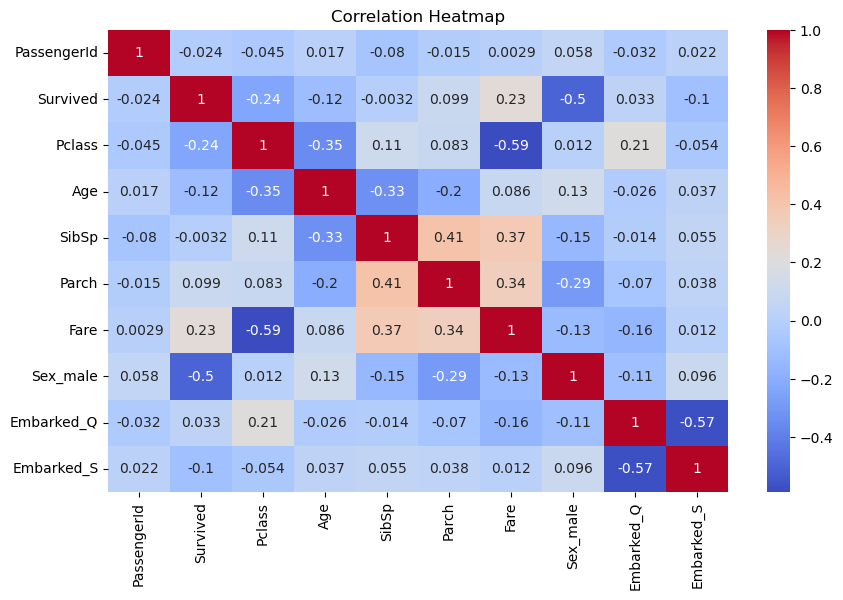

In [47]:
# Correlation matrix
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

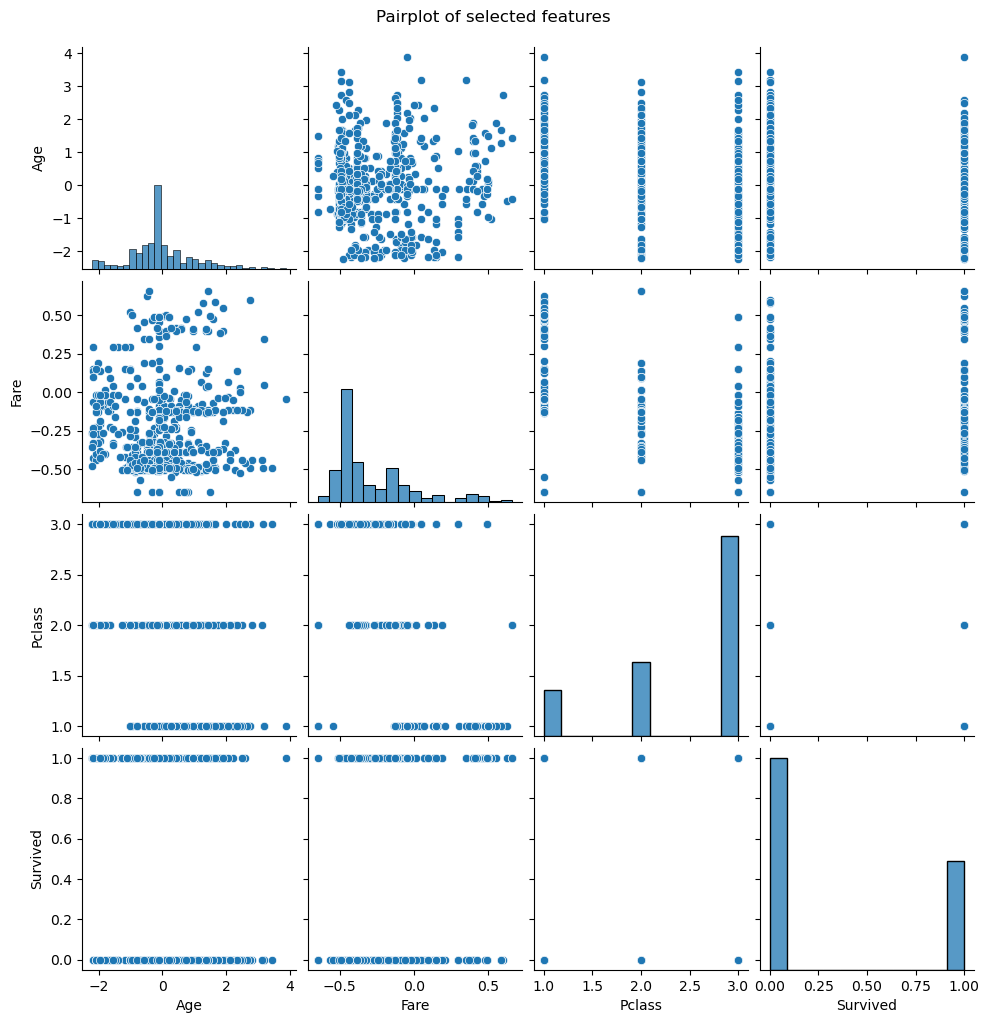

In [48]:
# --- Pairplot to see relationships between features ---
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']])
plt.suptitle("Pairplot of selected features", y=1.02)
plt.show()


In [50]:
# --- Identify patterns, trends, or anomalies ---

# Survival rate by Pclass
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print("Survival rate by Pclass:\n", survival_by_class)

# Survival rate by Sex (encoded column: Sex_male)
if 'Sex_male' in df.columns:
    survival_by_sex = df.groupby('Sex_male')['Survived'].mean()
    print("\nSurvival rate by Sex (0=female, 1=male):\n", survival_by_sex)

# Group by Age_group without warning
survival_by_age_group = df.groupby('Age_group', observed=False)['Survived'].mean()
print("\nSurvival rate by Age group:\n", survival_by_age_group)

# Detect anomalies: Extreme Fare outliers (if any remain)
fare_outliers = df[(df['Fare'] < df['Fare'].quantile(0.01)) | (df['Fare'] > df['Fare'].quantile(0.99))]
print("\nExtreme Fare outliers:\n", fare_outliers[['Fare','Survived']])

Survival rate by Pclass:
 Pclass
1    0.508929
2    0.486034
3    0.245868
Name: Survived, dtype: float64

Survival rate by Sex (0=female, 1=male):
 Sex_male
False    0.688525
True     0.178908
Name: Survived, dtype: float64

Survival rate by Age group:
 Age_group
Child          0.348515
Teen           0.383838
Young Adult    0.285714
Adult          0.302326
Senior         0.392857
Name: Survived, dtype: float64

Extreme Fare outliers:
          Fare  Survived
54   0.599510         0
92   0.583318         0
97   0.627278         1
155  0.587429         0
513  0.547579         1
615  0.660333         1
754  0.660333         1


In [51]:
# --- Basic feature-level inferences from visuals ---
print("\nInference 1: Passengers in higher classes (Pclass=1) survived more.")
print("Inference 2: Females (Sex_male=0) survived more than males (Sex_male=1).")
print("Inference 3: Age affects survival; younger passengers survived slightly more.")
print("Inference 4: Very extreme Fare values are unusual and could be anomalies.")


Inference 1: Passengers in higher classes (Pclass=1) survived more.
Inference 2: Females (Sex_male=0) survived more than males (Sex_male=1).
Inference 3: Age affects survival; younger passengers survived slightly more.
Inference 4: Very extreme Fare values are unusual and could be anomalies.
